# Trabajo 2 Opcional

 - Máster en Ciencia de Datos y Aprendizaje Automático.
 - Asignatura: Preparación de Datos.
 - Trabajo realizado por: Pablo Ascorbe e Ignacio Marco.
 - Fecha: --/01/2023.

## 1. Lectura y análisis del dataset

En este primer apartado importaremos los datos y haremos un estudio inicial de éstos.
Los datos se han conseguido en: https://zenodo.org/record/4265096#.Y7vcdBXMLct
<br><br>
Es un dataset que cuenta con 52.478 libros y 24 características, y cuyos datos están sacados de la lista de los mejores libros de GoodReads.

### 1.1. Importación de datos

In [1587]:
import pandas as pd
import numpy as np

df = pd.read_csv('libros.csv', header=0, dtype=object)
print(df.shape)

(52478, 25)


In [1588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bookId            52478 non-null  object
 1   title             52478 non-null  object
 2   series            23470 non-null  object
 3   author            52478 non-null  object
 4   rating            52478 non-null  object
 5   description       51140 non-null  object
 6   language          48672 non-null  object
 7   isbn              52478 non-null  object
 8   genres            52478 non-null  object
 9   characters        52478 non-null  object
 10  bookFormat        51005 non-null  object
 11  edition           4955 non-null   object
 12  pages             50131 non-null  object
 13  publisher         48782 non-null  object
 14  publishDate       51598 non-null  object
 15  firstPublishDate  31152 non-null  object
 16  awards            52478 non-null  object
 17  numRatings  

Vemos que tenemos demasiadas instancias y que podría estar bien reducir un poco para simplificar, pero de momento vamos a seguir con todos.

In [1589]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [1590]:
df.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


Vemos que las últimas instancias del dataframe contienen un formato de fechas distintas a las primeras.

Ya con esta primera visualización de los datos vemos que tenemos nulos y que hay columnas que no nos van a interesar para nada, como la imagen de la portada o el ISBN.

Otra duda es, ¿qué variable será la explicada? ¿Cuál usaremos como objetivo? Esto es totalmente libre y puede variar según nuestros intereses; como parece interesante determinar la puntuación de cada libro para poder predecir qué tan valorado será un libro concreto, nos quedaremos con 'rating'. 

In [1591]:
# Separamos explicativas de explicada

X, y = df.drop('rating', axis=1), df.rating
print(X.shape, y.shape)

(52478, 24) (52478,)


In [1592]:
X.head()

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


### 1.2. Estudio inicial del dataset

Como comentabamos, hay una serie de columnas que desde el comienzo no nos interesan; estas son: la URL de la portada, el ISBN, el identificador del libro, su título, la serie de la que viene y la descripción. De momento, eliminamos estas porque además de ser variables únicas, ya que casi todas son identificadores o textos extensos, no nos proporcionan información útil, a menos que podamos usar procesamiento de texto u otras técnicas que se escapan del objetivo del trabajo.

Bien es cierto, que podemos usar un identificador de entre los que tenemos para usarlo como índice del dataset, así que usaremos el título como dicho índice.

In [1593]:
X = X.set_index('title')
X.head()

,bookId,series,author,description,language,isbn,genres,characters,bookFormat,edition,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
title,,,,,,,,,,,,,,,,,,,,,
The Hunger Games,2767052-the-hunger-games,The Hunger Games #1,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
Harry Potter and the Order of the Phoenix,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
To Kill a Mockingbird,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
Pride and Prejudice,1885.Pride_and_Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
Twilight,41865.Twilight,The Twilight Saga #1,Stephenie Meyer,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


#### 1.2.1. Eliminación de variables irrelevantes

Eliminemos las variables que consideramos poco relevante por ser índices o aportar poca información.

In [1594]:
X = X.drop(['bookId', 'series', 'isbn', 'description', 'coverImg', 'author', 'publisher', 'edition'], axis=1)
X.head()

,language,genres,characters,bookFormat,pages,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
title,,,,,,,,,,,,,,,
The Hunger Games,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
Harry Potter and the Order of the Phoenix,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,870,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
To Kill a Mockingbird,English,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,324,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
Pride and Prejudice,English,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,279,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
Twilight,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,501,09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [1595]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          48672 non-null  object
 1   genres            52478 non-null  object
 2   characters        52478 non-null  object
 3   bookFormat        51005 non-null  object
 4   pages             50131 non-null  object
 5   publishDate       51598 non-null  object
 6   firstPublishDate  31152 non-null  object
 7   awards            52478 non-null  object
 8   numRatings        52478 non-null  object
 9   ratingsByStars    52478 non-null  object
 10  likedPercent      51856 non-null  object
 11  setting           52478 non-null  object
 12  bbeScore          52478 non-null  object
 13  bbeVotes          52478 non-null  object
 14  price             38113 non-null  object
dtypes: object(15)
memory usage: 6.4+ MB


#### 1.2.2. Tratamiento de variables numéricas

Vemos que muchas de las columnas tienen nulos y que como hay muchas que son listas, fechas u otro tipo de datos se han importado todas como object, vamos a parsear aquellas que sabemos que representan un número. Además, vemos que una columna, concretamente "edition", tiene 5000 valores de 52.500 siendo tan absolutamente pequeño que merecería la pena eliminarlo directamente, pero como eso se valora en otro apartado vamos a ser pacientes.

Vamos a hacer las transformaciones de los enteros primero, pero como no podemos transformar un 'NaN' a entero vamos a poner estos valores faltantes a -5, ya que en ningún caso de nuestras variables pueden darse valores negativos. Y luego, los devolveremos a 'NaN'.

Aunque primero mejor comprobarlo:

In [1596]:
df = pd.read_csv('libros.csv', header=0)
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


Vaya, vemos que algunos valores de bbeVotes tienen valores negativos, esto es un espurio o un dato real, como no lo podemos saber vamos a dejarlo. Por eso el -5 y no -1.

In [1597]:
#X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']] = X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']].fillna(-5).astype(np.int64)

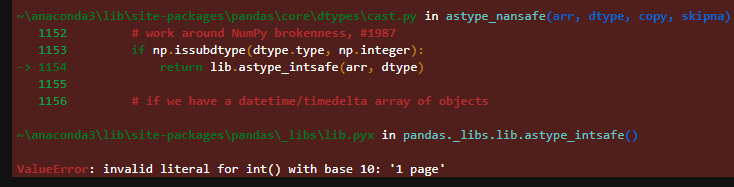

Hemos decidido dejar este error porque siendo obvio que las páginas son un entero, vemos que uno de los valores que intentamos parsear a enteros es '1 pages'; bienvenidos al magnífico mundo de la ciencia del dato.

In [1598]:
X.pages = X[['pages']].apply(pd.to_numeric, errors='coerce')

In [1599]:
X[['bbeScore', 'numRatings','bbeVotes']] = X[['bbeScore', 'numRatings','bbeVotes']].fillna(-5).astype(np.int64)

In [1600]:
X.replace(-5,np.NaN).info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   genres            52478 non-null  object 
 2   characters        52478 non-null  object 
 3   bookFormat        51005 non-null  object 
 4   pages             50108 non-null  float64
 5   publishDate       51598 non-null  object 
 6   firstPublishDate  31152 non-null  object 
 7   awards            52478 non-null  object 
 8   numRatings        52478 non-null  int64  
 9   ratingsByStars    52478 non-null  object 
 10  likedPercent      51856 non-null  object 
 11  setting           52478 non-null  object 
 12  bbeScore          52478 non-null  int64  
 13  bbeVotes          52478 non-null  int64  
 14  price             38113 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 6.4+ MB


Pages queda al final como float porque han tenido que ser eliminados ciertos datos de tipo cadena.

Para terminar con esta parte transformaremos los que son float64 y veremos los estadísticos más útiles:

In [1601]:
#X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

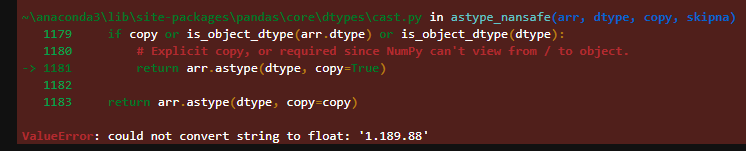

Otro error de un cariz parecido al anterior, vemos que en los números de más de tres cifras con decimales se usó el punto en los dos.

In [1602]:
res = []
for elem in X.price:
    partes = str(elem).split('.')
    if len(partes) > 2:
        aux = [partes[0],partes[1],".",partes[2]]
        res.append(''.join(aux))
    elif len(partes) == 2:
        aux = [partes[0],".",partes[1]]
        res.append(''.join(aux))
    else:
        if partes[0] != 'nan':
            res.append(partes[0])
        else:
            res.append(np.nan)
            
X = X.drop('price', axis = 1)

X['price'] = res
X.price

title
The Hunger Games                             5.09
Harry Potter and the Order of the Phoenix    7.38
To Kill a Mockingbird                         NaN
Pride and Prejudice                           NaN
Twilight                                      2.1
                                             ... 
Fractured                                     NaN
Anasazi                                       NaN
Marked                                       7.37
Wayward Son                                  2.86
Daughter of Helaman                          5.20
Name: price, Length: 52478, dtype: object

In [1603]:
X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

In [1604]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   genres            52478 non-null  object 
 2   characters        52478 non-null  object 
 3   bookFormat        51005 non-null  object 
 4   pages             50108 non-null  float64
 5   publishDate       51598 non-null  object 
 6   firstPublishDate  31152 non-null  object 
 7   awards            52478 non-null  object 
 8   numRatings        52478 non-null  int64  
 9   ratingsByStars    52478 non-null  object 
 10  likedPercent      51856 non-null  float64
 11  setting           52478 non-null  object 
 12  bbeScore          52478 non-null  int64  
 13  bbeVotes          52478 non-null  int64  
 14  price             38113 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 8.4+ MB


In [1605]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,50108.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000,38113.000000
mean,328.664864,1.787865e+04,92.231545,1.984023e+03,22.529003,10.414949
std,252.178359,1.039448e+05,5.990689,3.515314e+04,369.158541,60.213706
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,210.000000,3.410000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.307000e+03,94.000000,9.700000e+01,1.000000,5.210000
75%,392.000000,9.380500e+03,96.000000,1.870000e+02,2.000000,8.860000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


Libros con 0 páginas o votos negativos nos dan pistas de que eso son valores espurios, pero será mejor resolverlo en posteriores apartados. Aunque marcaremos los libros sin páginas como valores faltantes:

In [1606]:
X[X.pages < 1] = np.nan

In [1607]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,49944.000000,5.231400e+04,51698.000000,5.231400e+04,52314.000000,38042.000000
mean,329.744093,1.792728e+04,92.232156,1.989860e+03,22.594602,10.372188
std,251.886630,1.041035e+05,5.988560,3.520805e+04,369.734813,60.114667
min,2.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,212.000000,3.430000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.323500e+03,94.000000,9.700000e+01,1.000000,5.200000
75%,392.000000,9.408750e+03,96.000000,1.870000e+02,2.000000,8.850000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


In [1608]:
y = y.astype(np.float64)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52478 entries, 0 to 52477
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
52478 non-null  float64
dtypes: float64(1)
memory usage: 410.1 KB


In [1609]:
y.describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

#### 1.2.3. Tratamiento de variables categóricas

En este apartado trataremos las dos variables categóricas "language" y "bookFormat".

Primero nos definimos unas funciones auxiliares para facilitar el proceso.

In [1610]:
def mas_populares(lista, n):
    unique_values = pd.unique(lista)
    value_counts = pd.value_counts(lista)
    unique_values_sorted = value_counts.sort_values(ascending=False).index
    return unique_values_sorted[0:n]

def mas_populares_df(X, col_name, n):
    return mas_populares(X[col_name], n)

In [1611]:
print(mas_populares_df(X, 'language', 20))
print(mas_populares_df(X, 'bookFormat', 10))

Index(['English', 'Arabic', 'Spanish', 'French', 'German', 'Indonesian',
       'Portuguese', 'Italian', 'Dutch', 'Turkish', 'Persian', 'Polish',
       'Greek, Modern (1453-)', 'Russian', 'Japanese', 'Swedish', 'Romanian',
       'Bengali', 'Malay', 'Bulgarian'],
      dtype='object')
Index(['Paperback', 'Hardcover', 'Kindle Edition', 'Mass Market Paperback',
       'ebook', 'Audio CD', 'Nook', 'Unknown Binding', 'Audiobook',
       'Trade Paperback'],
      dtype='object')


Vemos que entre los idimos más populares está el griego moderno, pero para que no figure en ese fromato lo transformaremos más adelante.
<br><br>
Entre los formato de libros, vemos que muchos son muy parecidos de una misma categoría; por ello, los agruparemos para no tener muchas columnas.

In [1612]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48554 non-null  object 
 1   genres            52314 non-null  object 
 2   characters        52314 non-null  object 
 3   bookFormat        50841 non-null  object 
 4   pages             49944 non-null  float64
 5   publishDate       51435 non-null  object 
 6   firstPublishDate  31037 non-null  object 
 7   awards            52314 non-null  object 
 8   numRatings        52314 non-null  float64
 9   ratingsByStars    52314 non-null  object 
 10  likedPercent      51698 non-null  float64
 11  setting           52314 non-null  object 
 12  bbeScore          52314 non-null  float64
 13  bbeVotes          52314 non-null  float64
 14  price             38042 non-null  float64
dtypes: float64(6), object(9)
memory usage: 8.4+ MB


In [1613]:
X['language'] = X['language'].where(X['language'].isin(mas_populares_df(X, 'language', 20)), np.nan)
X['bookFormat'] = X['bookFormat'].where(X['bookFormat'].isin(mas_populares_df(X, 'bookFormat', 5)), np.nan)

In [1614]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          47811 non-null  object 
 1   genres            52314 non-null  object 
 2   characters        52314 non-null  object 
 3   bookFormat        49896 non-null  object 
 4   pages             49944 non-null  float64
 5   publishDate       51435 non-null  object 
 6   firstPublishDate  31037 non-null  object 
 7   awards            52314 non-null  object 
 8   numRatings        52314 non-null  float64
 9   ratingsByStars    52314 non-null  object 
 10  likedPercent      51698 non-null  float64
 11  setting           52314 non-null  object 
 12  bbeScore          52314 non-null  float64
 13  bbeVotes          52314 non-null  float64
 14  price             38042 non-null  float64
dtypes: float64(6), object(9)
memory usage: 8.4+ MB


In [1615]:
X['language'] = X['language'].replace('Greek, Modern (1453-)', 'Greek')

In [1616]:
X['bookFormat'] = X['bookFormat'].replace('Kindle Edition', 'Digital')
X['bookFormat'] = X['bookFormat'].replace('ebook', 'Digital')
X['bookFormat'] = X['bookFormat'].replace('Nook', 'Digital')

X['bookFormat'] = X['bookFormat'].replace('Mass Market Paperback', 'Paperback')
X['bookFormat'] = X['bookFormat'].replace('Trade Paperback', 'Paperback')

X['bookFormat'] = X['bookFormat'].replace('Audio CD', 'Audio')
X['bookFormat'] = X['bookFormat'].replace('Audiobook', 'Audio')

X['bookFormat'] = X['bookFormat'].replace('Unknown Binding', np.nan)

In [1617]:
X.bookFormat.unique()

array(['Hardcover', 'Paperback', 'Digital', nan], dtype=object)

Vemos que ya hemos terminado con este apartado, pasemos a las fechas.

#### 1.2.4. Tratamiento de fechas


In [1618]:
X[['publishDate', 'firstPublishDate']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   publishDate       51435 non-null  object
 1   firstPublishDate  31037 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [1619]:
X = X.drop(['firstPublishDate'], axis=1)

In [1620]:
X['publishDate']

title
The Hunger Games                                       09/14/08
Harry Potter and the Order of the Phoenix              09/28/04
To Kill a Mockingbird                                  05/23/06
Pride and Prejudice                                    10/10/00
Twilight                                               09/06/06
                                                    ...        
Fractured                                                   NaN
Anasazi                                         August 5th 2011
Marked                                          March 18th 2011
Wayward Son                                  September 1st 2011
Daughter of Helaman                                May 8th 2011
Name: publishDate, Length: 52478, dtype: object

In [1621]:
X['publishDate'] = pd.to_datetime(X['publishDate'], errors='coerce')
X['publishDate']

title
The Hunger Games                            2008-09-14
Harry Potter and the Order of the Phoenix   2004-09-28
To Kill a Mockingbird                       2006-05-23
Pride and Prejudice                         2000-10-10
Twilight                                    2006-09-06
                                               ...    
Fractured                                          NaT
Anasazi                                     2011-08-05
Marked                                      2011-03-18
Wayward Son                                 2011-09-01
Daughter of Helaman                         2011-05-08
Name: publishDate, Length: 52478, dtype: datetime64[ns]

In [1622]:
X['publishYear'] = X['publishDate'].dt.year
X['publishMonth'] = X['publishDate'].dt.month
X['publishDay'] = X['publishDate'].dt.day

X = X.drop(['publishDate'], axis=1)

X.head(1)

,language,genres,characters,bookFormat,pages,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay
title,,,,,,,,,,,,,,,,
The Hunger Games,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,374.0,['Locus Award Nominee for Best Young Adult Boo...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816.0,30516.0,5.09,2008.0,9.0,14.0


#### 1.2.5. Tratamiento de variables con formato lista

Vamos a crear un método que transforme las variables con una cadena semejante a una lista en éstas.

In [1623]:
import ast

def trans_list(nom_col, X):
    res = []
    for elem in X[nom_col]:
        if pd.isna(elem):
                res.append(np.nan)
        else:
            res.append(ast.literal_eval(elem))
    return res

Primero, vamos a decidir qué variables queremos preprocesar y cuales eliminar porque la información que nos pueden aportar no sea suficiente. Eliminemos estas variables.

In [1624]:
X = X.drop(['characters', 'setting'], axis=1)
X.head()

,language,genres,bookFormat,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay
title,,,,,,,,,,,,,,
The Hunger Games,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374.0,['Locus Award Nominee for Best Young Adult Boo...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816.0,30516.0,5.09,2008.0,9.0,14.0
Harry Potter and the Order of the Phoenix,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,870.0,['Bram Stoker Award for Works for Young Reader...,2507623.0,"['1593642', '637516', '222366', '39573', '14526']",98.0,2632233.0,26923.0,7.38,2004.0,9.0,28.0
To Kill a Mockingbird,English,"['Classics', 'Fiction', 'Historical Fiction', ...",Paperback,324.0,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075.0,"['2363896', '1333153', '573280', '149952', '80...",95.0,2269402.0,23328.0,NaN,2006.0,5.0,23.0
Pride and Prejudice,English,"['Classics', 'Fiction', 'Romance', 'Historical...",Paperback,279.0,[],2998241.0,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116.0,20452.0,NaN,2000.0,10.0,10.0
Twilight,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",Paperback,501.0,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519.0,"['1751460', '1113682', '1008686', '542017', '5...",78.0,1459448.0,14874.0,2.10,2006.0,9.0,6.0


Y ahora transformemos las que sí que deseamos transformar a listas.

In [1625]:
res = trans_list('genres', X)
X = X.drop('genres', axis = 1)
X['genres'] = res

res = trans_list('ratingsByStars', X)
X = X.drop('ratingsByStars', axis = 1)
X['ratingsByStars'] = res

res = trans_list('awards', X)
X = X.drop('awards', axis = 1)
X['awards'] = res

In [1626]:
X.genres[0][0]

'Young Adult'

Ahora, teniendo ya las listas en su formato correspondiente, vamos a tratar cada una de ellas:
   - 'ratingsByStars': Tendría sentido separar cada uno de los cinco elementos en cinco columnas distintas; una para las cinco estrellas, otra para las cuatro y así hasta las valoraciones de una estrella.
   - 'awards': vamos a contar el número de premios que tiene, si que estaríamos sesgando ligeramente el resultado porque no valen lo mismo unos premios que otros; pero no teniendo un conocimiento sobre éstos es la mejor solución.
   - 'genre': con esta lista, lo mejor sería contar los 20 géneros más populares y dedicar en un oneHot encoding una columna a cada género, aquellos que no tengan género o sus generos no estén en esa lista tendrán todo ceros.

ratingsByStars:

In [1627]:
X["ratingsByStars"].isna().sum()

164

Transformamos los nulos a listas con 0s para que no nos den problemas, esto lo haremos con las tres listas.

In [1628]:
X["ratingsByStars"] = X["ratingsByStars"].apply(lambda x: [0, 0, 0, 0, 0] if pd.isna(np.array(x)).any() or not x else x)

In [1629]:
X["ratingsByStars"].isna().sum()

0

In [1630]:
res = pd.DataFrame(X["ratingsByStars"].to_list(), columns=['5Stars', '4Stars', '3Stars', '2Stars', '1Star'], index = X.index)
X = X.drop('ratingsByStars', axis = 1)
X = pd.concat([X, res], axis = 1)
X.head()

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay,genres,awards,5Stars,4Stars,3Stars,2Stars,1Star
title,,,,,,,,,,,,,,,,,,
The Hunger Games,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,14.0,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",[Locus Award Nominee for Best Young Adult Book...,3444695,1921313,745221,171994,93557
Harry Potter and the Order of the Phoenix,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,28.0,"[Fantasy, Young Adult, Fiction, Magic, Childre...",[Bram Stoker Award for Works for Young Readers...,1593642,637516,222366,39573,14526
To Kill a Mockingbird,English,Paperback,324.0,4501075.0,95.0,2269402.0,23328.0,NaN,2006.0,5.0,23.0,"[Classics, Fiction, Historical Fiction, School...","[Pulitzer Prize for Fiction (1961), Audie Awar...",2363896,1333153,573280,149952,80794
Pride and Prejudice,English,Paperback,279.0,2998241.0,94.0,1983116.0,20452.0,NaN,2000.0,10.0,10.0,"[Classics, Fiction, Romance, Historical Fictio...",[],1617567,816659,373311,113934,76770
Twilight,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,6.0,"[Young Adult, Fantasy, Romance, Vampires, Fict...","[Georgia Peach Book Award (2007), Buxtehuder B...",1751460,1113682,1008686,542017,548674


In [1631]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52314 non-null  object 
 12  awards        52314 non-null  object 
 13  5Stars        52478 non-null  object 
 14  4Stars        52478 non-null  object 
 15  3Stars        52478 non-null  object 
 16  2Stars        52478 non-null  object 
 17  1Star         52478 non-null  object 
dtypes:

awards:

Procedemos con la columna "awards", en este vamos a contar cuantos premios tiene y reemplazar ese valor por la lista.

In [1632]:
X["awards"] = X["awards"].apply(lambda x: [] if pd.isna(np.array(x)).any() else x)

In [1633]:
res = [len(x) for x in X.awards]
X["awards"] = res

In [1634]:
X.awards

title
The Hunger Games                             41
Harry Potter and the Order of the Phoenix     9
To Kill a Mockingbird                         4
Pride and Prejudice                           0
Twilight                                     25
                                             ..
Fractured                                     0
Anasazi                                       0
Marked                                        1
Wayward Son                                   0
Daughter of Helaman                           0
Name: awards, Length: 52478, dtype: int64

genre:

Para el género calculamos las 20 categorias más populares:

In [1635]:
def mas_populares_lista(X, col_name, n):
    lista_global = [subelemento for elemento in X["genres"].to_list() if not pd.isna(np.array(elemento)).any() for subelemento in elemento]
    return mas_populares(lista_global, n)

In [1636]:
%%time
mas_populares_lista(X, 'genres', 20)

Wall time: 557 ms


Index(['Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Contemporary', 'Adult',
       'Nonfiction', 'Novels', 'Mystery', 'Historical Fiction', 'Audiobook',
       'Classics', 'Adventure', 'Historical', 'Paranormal', 'Literature',
       'Science Fiction', 'Childrens', 'Thriller', 'Magic'],
      dtype='object')

Casi lo tenemos, pero como entre todas ellas hay una que es "Audiobook" vamos a buscar 21 y cambiarla por esa.

In [1637]:
gen_pop = mas_populares_lista(X, 'genres', 21).delete(10)

In [1638]:
X["genres"] = X["genres"].apply(lambda x: [] if pd.isna(np.array(x)).any() else x)

In [1639]:
X["genres"] = X['genres'].apply(lambda x: [elem for elem in x if elem in gen_pop])

In [1640]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52478 non-null  object 
 12  awards        52478 non-null  int64  
 13  5Stars        52478 non-null  object 
 14  4Stars        52478 non-null  object 
 15  3Stars        52478 non-null  object 
 16  2Stars        52478 non-null  object 
 17  1Star         52478 non-null  object 
dtypes:

Ya solo nos falta cambiar el formato de las columnas de las estrellas a "int64".

In [1641]:
X[['5Stars', '4Stars', '3Stars', '2Stars', '1Star']] = X[['5Stars', '4Stars', '3Stars', '2Stars', '1Star']].astype(np.int64)

In [1642]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      47811 non-null  object 
 1   bookFormat    49896 non-null  object 
 2   pages         49944 non-null  float64
 3   numRatings    52314 non-null  float64
 4   likedPercent  51698 non-null  float64
 5   bbeScore      52314 non-null  float64
 6   bbeVotes      52314 non-null  float64
 7   price         38042 non-null  float64
 8   publishYear   50532 non-null  float64
 9   publishMonth  50532 non-null  float64
 10  publishDay    50532 non-null  float64
 11  genres        52478 non-null  object 
 12  awards        52478 non-null  int64  
 13  5Stars        52478 non-null  int64  
 14  4Stars        52478 non-null  int64  
 15  3Stars        52478 non-null  int64  
 16  2Stars        52478 non-null  int64  
 17  1Star         52478 non-null  int64  
dtypes:

Y con esto habríamos acabado todo el apartado de preprocesado, que vemos que no es poco. Pero antes, para poder realizar los apartados posteriores, vamos a hacer un OneHot encoding sobre los géneros, para tener 20 columnas para cada género y no una lista.

In [1643]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(X.genres),
                   columns=mlb.classes_,
                   index=X.index)
res.head()

,Adult,Adventure,Childrens,Classics,Contemporary,Fantasy,Fiction,Historical,Historical Fiction,Humor,Literature,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult
title,,,,,,,,,,,,,,,,,,,,
The Hunger Games,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Harry Potter and the Order of the Phoenix,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
To Kill a Mockingbird,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1
Pride and Prejudice,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0
Twilight,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1


In [1644]:
X = X.drop('genres', axis = 1)
X = pd.concat([X, res], axis = 1)
X.head()

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,...,Literature,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult
title,,,,,,,,,,,,,,,,,,,,,
The Hunger Games,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,...,0,0,0,0,0,0,1,1,0,1
Harry Potter and the Order of the Phoenix,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,...,0,1,0,0,0,0,0,0,0,1
To Kill a Mockingbird,English,Paperback,324.0,4501075.0,95.0,2269402.0,23328.0,NaN,2006.0,5.0,...,1,0,0,0,1,0,0,0,0,1
Pride and Prejudice,English,Paperback,279.0,2998241.0,94.0,1983116.0,20452.0,NaN,2000.0,10.0,...,1,0,0,0,1,0,1,0,0,0
Twilight,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,...,0,0,0,0,0,1,1,0,0,1


Vamos a exportar el dataset, para poder trabajar a partir de aquí de una mejor manera.

In [1645]:
X["target"] = y.values
X.to_csv('libros_preprocesado.csv')

In [1646]:
X, y = X.drop('target', axis=1), X.target
print(X.shape, y.shape)

(52478, 37) (52478,)


## 2. Preprocesado

Primero, vamos a cargar los datos preprocesados, para no tener que ejecutar todo lo anterior.

In [1647]:
import pandas as pd
import numpy as np

df = pd.read_csv('libros_preprocesado.csv', header=0).set_index('title')
print(df.shape)

(52478, 38)


Para limpiar los datos, vamos a eliminar las columnas que contengan un único valor y a estudiar aquellas que tengan un bajo número de valores diferentes o una baja varianza. También vamos a eliminar las filas repetidas.También analizaremos tanto los valores nulos, realizando el borrado o las imputaciones correspondientes, como los outliers, aplicando las técnicas estudiadas en clase.
<br><br>
Después, se aplicarán técnicas en esos datos que implicarán codificar, escalar y transformar su distribución, para terminar aplicando "features engineering".

### 2.1. Limpieza básica de datos

#### 2.1.1. Valores únicos

Primero, para identificar los valores únicos, vamos a comprobar para cada columna cuantos tiene:

In [1648]:
df.nunique()

language                 20
bookFormat                3
pages                  1363
numRatings            19336
likedPercent             66
bbeScore               3540
bbeVotes                649
price                  3649
publishYear             126
publishMonth             12
publishDay               31
awards                   27
5Stars                12888
4Stars                12473
3Stars                 9681
2Stars                 5002
1Star                  3226
Adult                     2
Adventure                 2
Childrens                 2
Classics                  2
Contemporary              2
Fantasy                   2
Fiction                   2
Historical                2
Historical Fiction        2
Humor                     2
Literature                2
Magic                     2
Mystery                   2
Nonfiction                2
Novels                    2
Paranormal                2
Romance                   2
Science Fiction           2
Thriller            

Tenemos las columnas a las que les hemos aplicado el OneHot encoding que tienen únicamente 2 valores, pero eso es normal; a parte de estas variables, ninguna numérica tienen pocos valores como para ser eliminada.

#### 2.1.2. Baja variedad de valores

Para llevar a cabo la identificación de las variables que tienen una baja variedad de valores, mostremos para cada una el número de valores únicos que toma y el porcentaje que supone respecto al total de registros.

In [1649]:
for i in range(df.shape[1]+1):
    name = ''
    if i >= X.shape[1]:
        num = len(y.unique())
        name = y.name
    else:
        num = len(X.iloc[:, i].unique())
        name = X.columns[i]
    percentage = num / X.shape[0] * 100
    print('%d \t %d \t %.1f%% \t %s' % (i, num, percentage, name))

0 	 21 	 0.0% 	 language
1 	 4 	 0.0% 	 bookFormat
2 	 1364 	 2.6% 	 pages
3 	 19337 	 36.8% 	 numRatings
4 	 67 	 0.1% 	 likedPercent
5 	 3541 	 6.7% 	 bbeScore
6 	 650 	 1.2% 	 bbeVotes
7 	 3650 	 7.0% 	 price
8 	 127 	 0.2% 	 publishYear
9 	 13 	 0.0% 	 publishMonth
10 	 32 	 0.1% 	 publishDay
11 	 27 	 0.1% 	 awards
12 	 12888 	 24.6% 	 5Stars
13 	 12473 	 23.8% 	 4Stars
14 	 9681 	 18.4% 	 3Stars
15 	 5002 	 9.5% 	 2Stars
16 	 3226 	 6.1% 	 1Star
17 	 2 	 0.0% 	 Adult
18 	 2 	 0.0% 	 Adventure
19 	 2 	 0.0% 	 Childrens
20 	 2 	 0.0% 	 Classics
21 	 2 	 0.0% 	 Contemporary
22 	 2 	 0.0% 	 Fantasy
23 	 2 	 0.0% 	 Fiction
24 	 2 	 0.0% 	 Historical
25 	 2 	 0.0% 	 Historical Fiction
26 	 2 	 0.0% 	 Humor
27 	 2 	 0.0% 	 Literature
28 	 2 	 0.0% 	 Magic
29 	 2 	 0.0% 	 Mystery
30 	 2 	 0.0% 	 Nonfiction
31 	 2 	 0.0% 	 Novels
32 	 2 	 0.0% 	 Paranormal
33 	 2 	 0.0% 	 Romance
34 	 2 	 0.0% 	 Science Fiction
35 	 2 	 0.0% 	 Thriller
36 	 2 	 0.0% 	 Young Adult
37 	 261 	 0.5% 	 target


Vemos que en hay variables que tienen pocos valores distintos, pero esto es porque son varaibles categóricas limitadas a un rango concreto. No parece necesario eliminar estas variables.

#### 2.1.3. Valores de baja varianza

Ahora vamos a comprobar qué variables tienen una varianza muy muy pequeña, lo cual implicaría que estuvieran muy cerca de tener un solo valor, y de ser necesario eliminarlas también.

Primero, separamos las variables explicativas de la explicada:

In [1650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   language            47811 non-null  object 
 1   bookFormat          49896 non-null  object 
 2   pages               49944 non-null  float64
 3   numRatings          52314 non-null  float64
 4   likedPercent        51698 non-null  float64
 5   bbeScore            52314 non-null  float64
 6   bbeVotes            52314 non-null  float64
 7   price               38042 non-null  float64
 8   publishYear         50532 non-null  float64
 9   publishMonth        50532 non-null  float64
 10  publishDay          50532 non-null  float64
 11  awards              52478 non-null  int64  
 12  5Stars              52478 non-null  int64  
 13  4Stars              52478 non-null  int64  
 14  3Stars              52478 non-null  int64  
 15  2Stars              52478 non

In [1651]:
from sklearn.feature_selection import VarianceThreshold

#También necesitamos, para este método quedarnos solo con las variables numéricas
col_num = df.iloc[:,2:-1]

thresholds = np.arange(0.0, 0.31, 0.01)

results = list()
for t in thresholds:
    
    transform = VarianceThreshold(threshold=t)
    
    col_num_trans = transform.fit_transform(col_num)
    
    n_features = col_num_trans.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    
    results.append(n_features)

>Threshold=0.00, Features=35
>Threshold=0.01, Features=35
>Threshold=0.02, Features=35
>Threshold=0.03, Features=35
>Threshold=0.04, Features=35
>Threshold=0.05, Features=35
>Threshold=0.06, Features=35
>Threshold=0.07, Features=35
>Threshold=0.08, Features=32
>Threshold=0.09, Features=31
>Threshold=0.10, Features=29
>Threshold=0.11, Features=26
>Threshold=0.12, Features=25
>Threshold=0.13, Features=22
>Threshold=0.14, Features=20
>Threshold=0.15, Features=20
>Threshold=0.16, Features=20
>Threshold=0.17, Features=19
>Threshold=0.18, Features=18
>Threshold=0.19, Features=18
>Threshold=0.20, Features=18
>Threshold=0.21, Features=16
>Threshold=0.22, Features=16
>Threshold=0.23, Features=16
>Threshold=0.24, Features=15
>Threshold=0.25, Features=15
>Threshold=0.26, Features=15
>Threshold=0.27, Features=15
>Threshold=0.28, Features=15
>Threshold=0.29, Features=15
>Threshold=0.30, Features=15


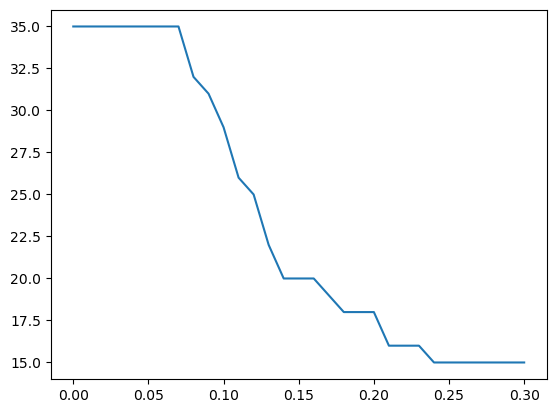

In [1652]:
import matplotlib.pyplot as plt

plt.plot(thresholds, results)
plt.show()

Vemos que puede ser interesante eliminar las variables hasta el 0.15, por ello vamos generar dos datasets: uno con todas las variables y otro con las eliminadas.

In [1653]:
transform = VarianceThreshold(threshold=0.15)

df_noLowVar = transform.fit_transform(col_num)
df_noLowVar.shape

(52478, 20)

In [1654]:
df_noLowVar = pd.concat([pd.DataFrame(df_noLowVar, index=df.index),  df.iloc[:,:2], df.target], axis=1)

Vamos almacenando nuestros datasets en la siguiente lista.

In [1655]:
datasets = {"Original": df, "Sin baja varianza": df_noLowVar}

#### 2.1.4. Valores duplicados

Veamos el número de registros duplicados (contando la variable target) que existen en nuestros datasets.

In [1656]:
# Normal
dups = datasets["Original"].duplicated()
print(dups.any())
print(datasets["Original"][dups].shape[0])
# Sin variables con baja varianza
dups = datasets["Sin baja varianza"].duplicated()
print(dups.any())
print(datasets["Sin baja varianza"][dups].shape[0])

True
124
True
124


Vemos que tenemos 50 columnas duplicadas, procedemos a eliminarlas.

In [1657]:
print("Con duplicados: ", datasets["Original"].shape)
datasets["Original"].drop_duplicates(inplace=True)
print("Sin duplicados: ", datasets["Original"].shape)

Con duplicados:  (52478, 38)
Sin duplicados:  (52354, 38)


Lo hacemos para el otro dataset:

In [1658]:
print("Con duplicados: ", datasets["Sin baja varianza"].shape)
datasets["Sin baja varianza"].drop_duplicates(inplace=True)
print("Sin duplicados: ", datasets["Sin baja varianza"].shape)

Con duplicados:  (52478, 23)
Sin duplicados:  (52354, 23)


Ya tenemos nuestros datos limpios de duplicados.

### 2.2. Identificación de outliers y valores perdidos

En este apartado trataremos de identificar los valores espurios y los faltantes, posteriormente decidiremos si los eliminamos o no.

#### 2.2.1. Outliers

Comencemos primero con los valores espurios.

##### 2.2.1.1. Borrado de outliers mediante el Standard Deviation Method

Primero vamos a comprobar qué distribución siguen nuestros datos.

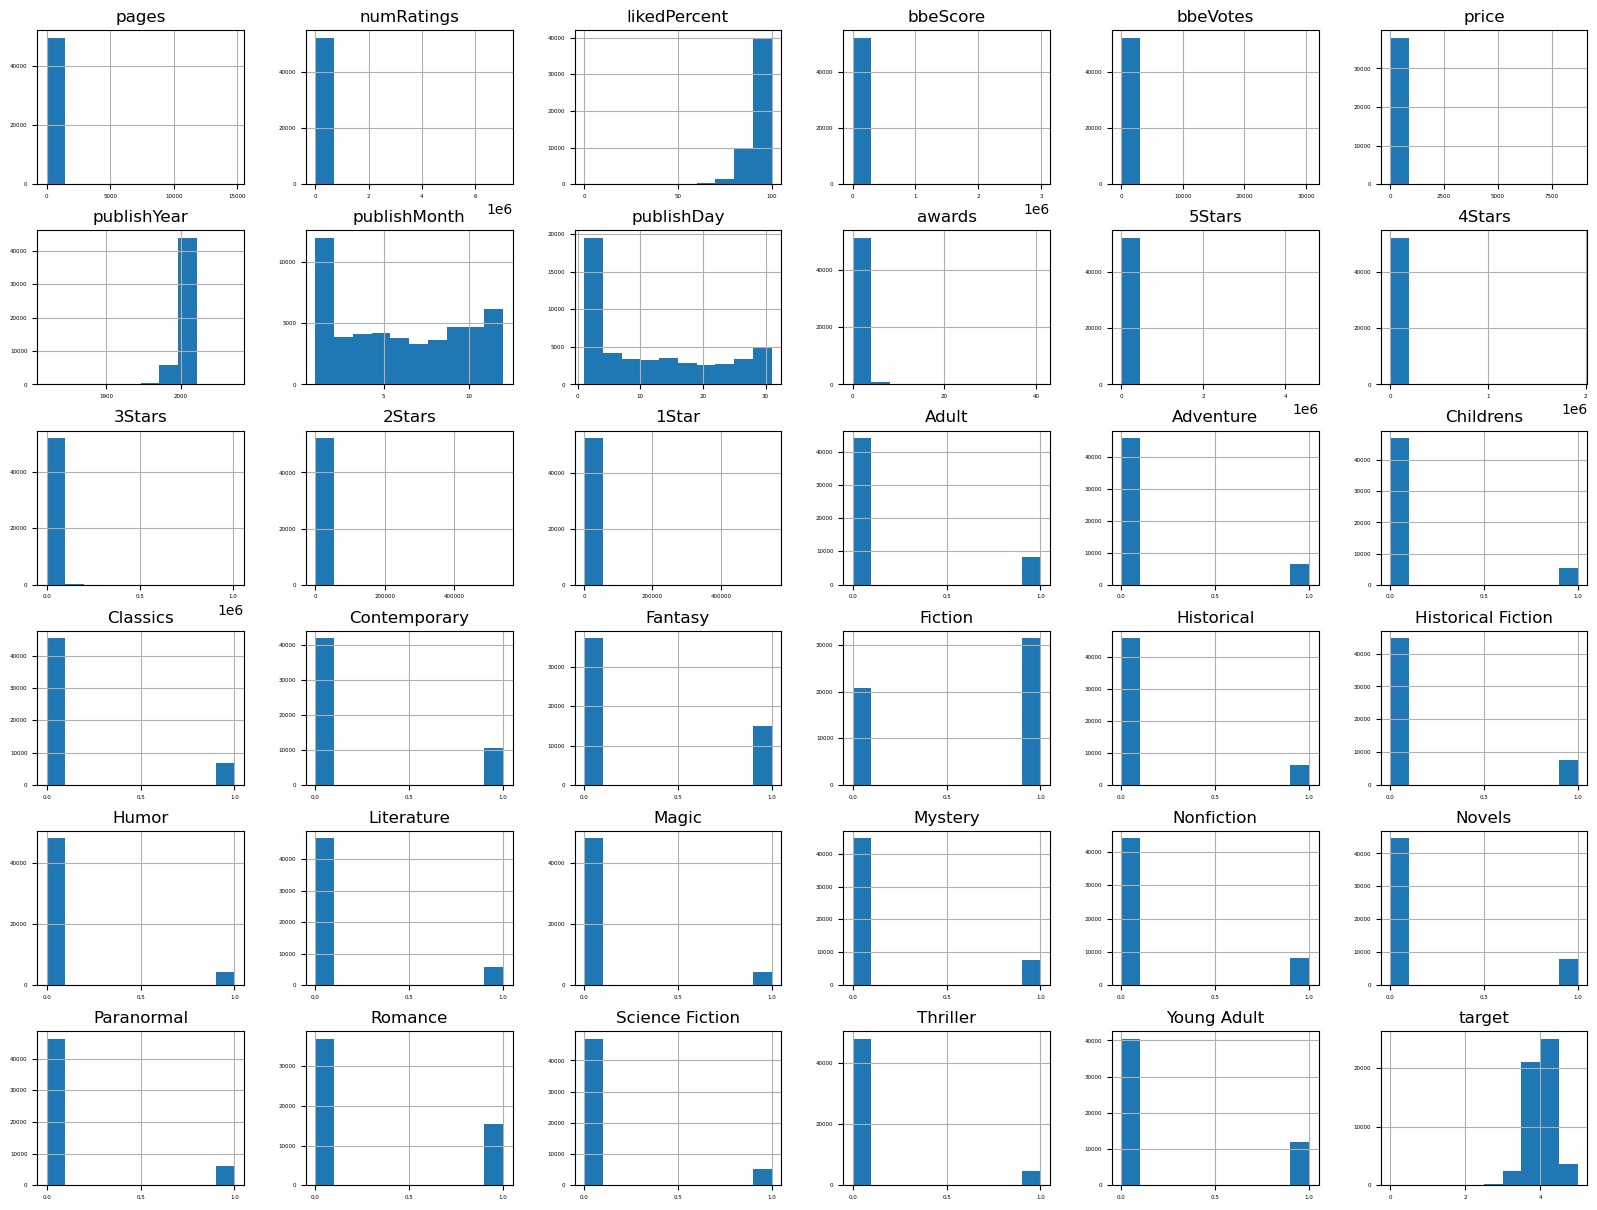

In [1659]:
import matplotlib.pyplot as plt

fig = df.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

Viendo estas distribuciones podemos aseverar que tenemos espurios. Quitando las variables de onehot, las de las fechas y alguna otra, deberiamos aplicar reducción de outliers a estas.

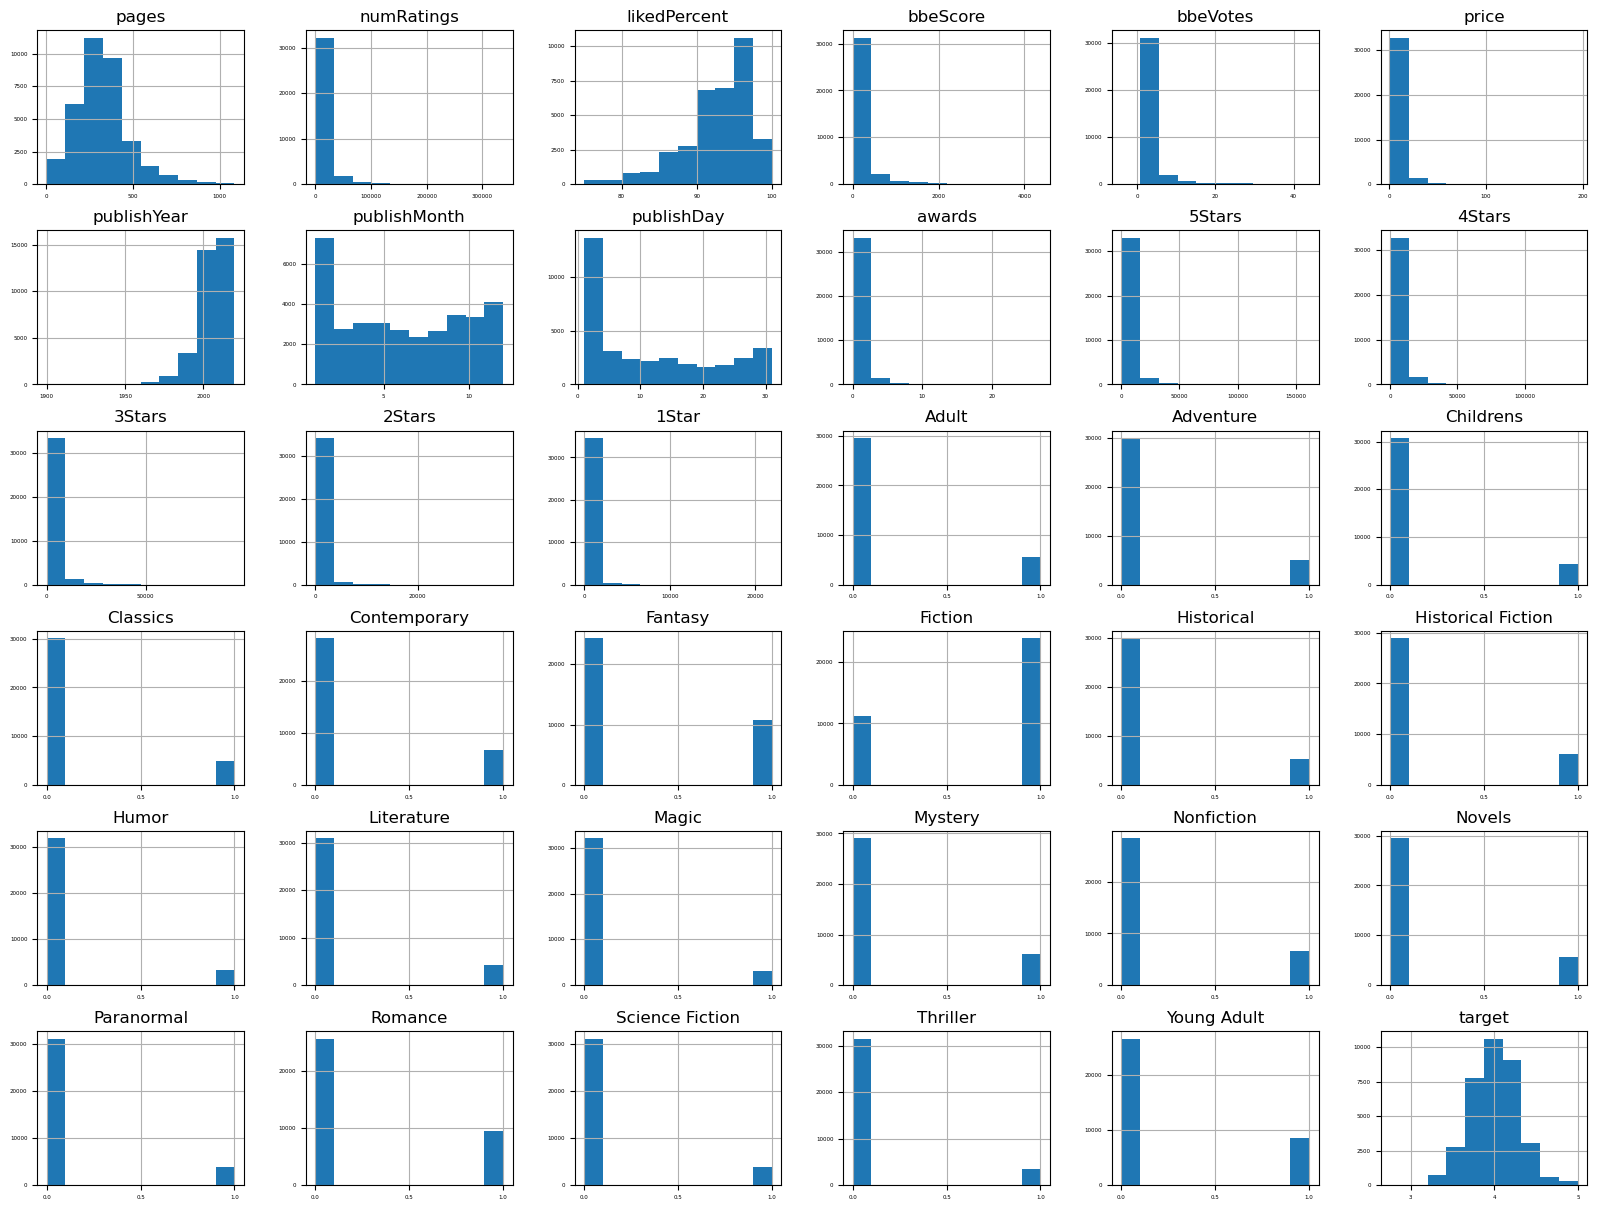

In [1660]:
col_num_outlier = df.iloc[:, 2:8]

df_SDM = df.copy()

for elem in col_num_outlier:
    data_mean, data_std = np.mean(df_SDM[elem]), np.std(df_SDM[elem])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    df_SDM = df_SDM[(df_SDM[elem] >= lower) & (df_SDM[elem] <= upper)]
    
fig = df_SDM.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [1661]:
df_SDM.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay,awards,...,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult,target
count,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,34807.000000,34807.000000,34807.000000,35085.000000,...,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000,35085.000000
mean,325.262135,10835.141656,92.557019,221.921362,2.843152,8.433705,2004.958083,6.066739,10.871147,0.477954,...,0.085022,0.172809,0.189825,0.160610,0.111415,0.271341,0.113011,0.102038,0.242554,4.001510
std,155.356337,22334.726741,4.621346,373.050725,4.845421,13.315507,9.607663,3.477330,10.199165,1.207993,...,0.278919,0.378087,0.392168,0.367176,0.314650,0.444658,0.316611,0.302702,0.428634,0.284111
min,2.000000,1.000000,75.000000,0.000000,-4.000000,0.840000,1900.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.750000
25%,224.000000,700.000000,90.000000,82.000000,1.000000,3.220000,2001.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.810000
50%,312.000000,3198.000000,94.000000,97.000000,1.000000,5.200000,2007.000000,6.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,397.000000,10671.000000,96.000000,189.000000,2.000000,8.620000,2011.000000,9.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.190000
max,1085.000000,337495.000000,100.000000,4373.000000,44.000000,195.000000,2020.000000,12.000000,31.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


Como podemos ver el valor negativo de bbeVotes está perjudicando a nuestro dataset, así que lo vamos a eliminar.

In [1662]:
df_SDM = df_SDM[(df_SDM['bbeVotes'] > 0)]
df_SDM.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,publishDay,awards,...,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult,target
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,34763.000000,34763.000000,34763.000000,35040.000000,...,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,325.274058,10842.768779,92.556022,222.083761,2.848659,8.434739,2004.957512,6.066738,10.872134,0.478168,...,0.085074,0.172774,0.189755,0.160731,0.111473,0.271290,0.112842,0.102055,0.242694,4.001408
std,155.333149,22346.026040,4.619498,373.261766,4.845990,13.322077,9.607887,3.477492,10.200863,1.208451,...,0.278996,0.378057,0.392112,0.367288,0.314721,0.444632,0.316405,0.302725,0.428718,0.284055
min,2.000000,1.000000,75.000000,0.000000,1.000000,0.840000,1900.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.750000
25%,224.000000,700.000000,90.000000,82.000000,1.000000,3.220000,2001.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.810000
50%,312.000000,3199.000000,94.000000,97.000000,1.000000,5.200000,2007.000000,6.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398.000000,10680.000000,96.000000,189.000000,2.000000,8.612500,2011.000000,9.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.190000
max,1085.000000,337495.000000,100.000000,4373.000000,44.000000,195.000000,2020.000000,12.000000,31.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


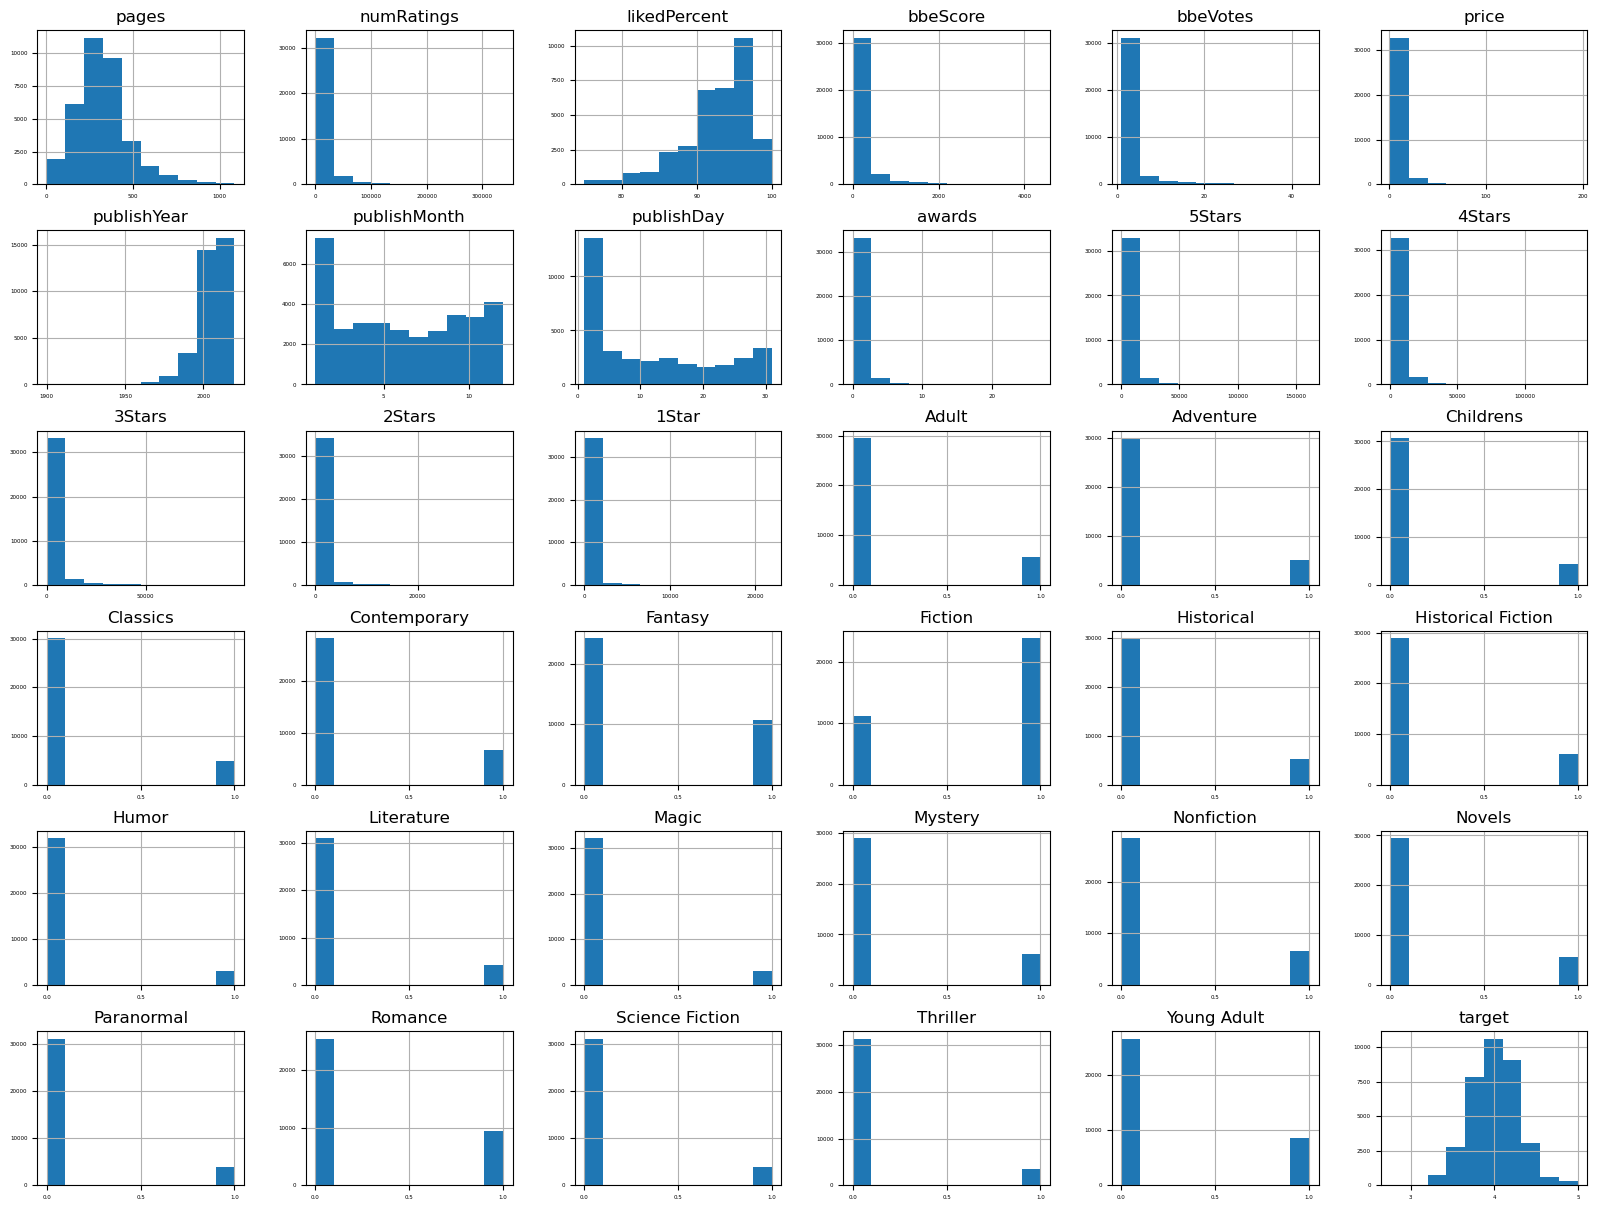

In [1663]:
fig = df_SDM.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [1664]:
df_SDM.shape

(35040, 38)

In [1665]:
datasets["SDM"] = df_SDM

Vemos que hemos eliminado muchos datos, pero seguimos teniendo una grandísima cantidad de estos. Además, ahora podemos ver bien las distribuciones de nuestros datos.

##### 2.2.1.2. Identificación de outliers mediante el Interquartile Range Method (IQR)

In [1666]:
df_IQR = df.copy()

for i in df_IQR.iloc[:, 2:8]:
    print(i)
    datos = df_IQR[[i]].values.astype('int64')
    
    q25, q75 = np.percentile(datos, 25), np.percentile(datos, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in datos if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    df_IQR = df_IQR[(df_IQR[i] >= lower) & (df_IQR[i] <= upper)]

pages
Percentiles: 25th=195.000, 75th=386.000, IQR=191.000
Identified outliers: 4576
numRatings
Percentiles: 25th=406.250, 75th=10005.000, IQR=9598.750
Identified outliers: 5983
likedPercent
Percentiles: 25th=89.000, 75th=96.000, IQR=7.000
Identified outliers: 1864
bbeScore
Percentiles: 25th=81.000, 75th=135.000, IQR=54.000
Identified outliers: 5197
bbeVotes
Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 6210
price
Percentiles: 25th=-9223372036854775808.000, 75th=6.000, IQR=9223372036854775808.000
Identified outliers: 0


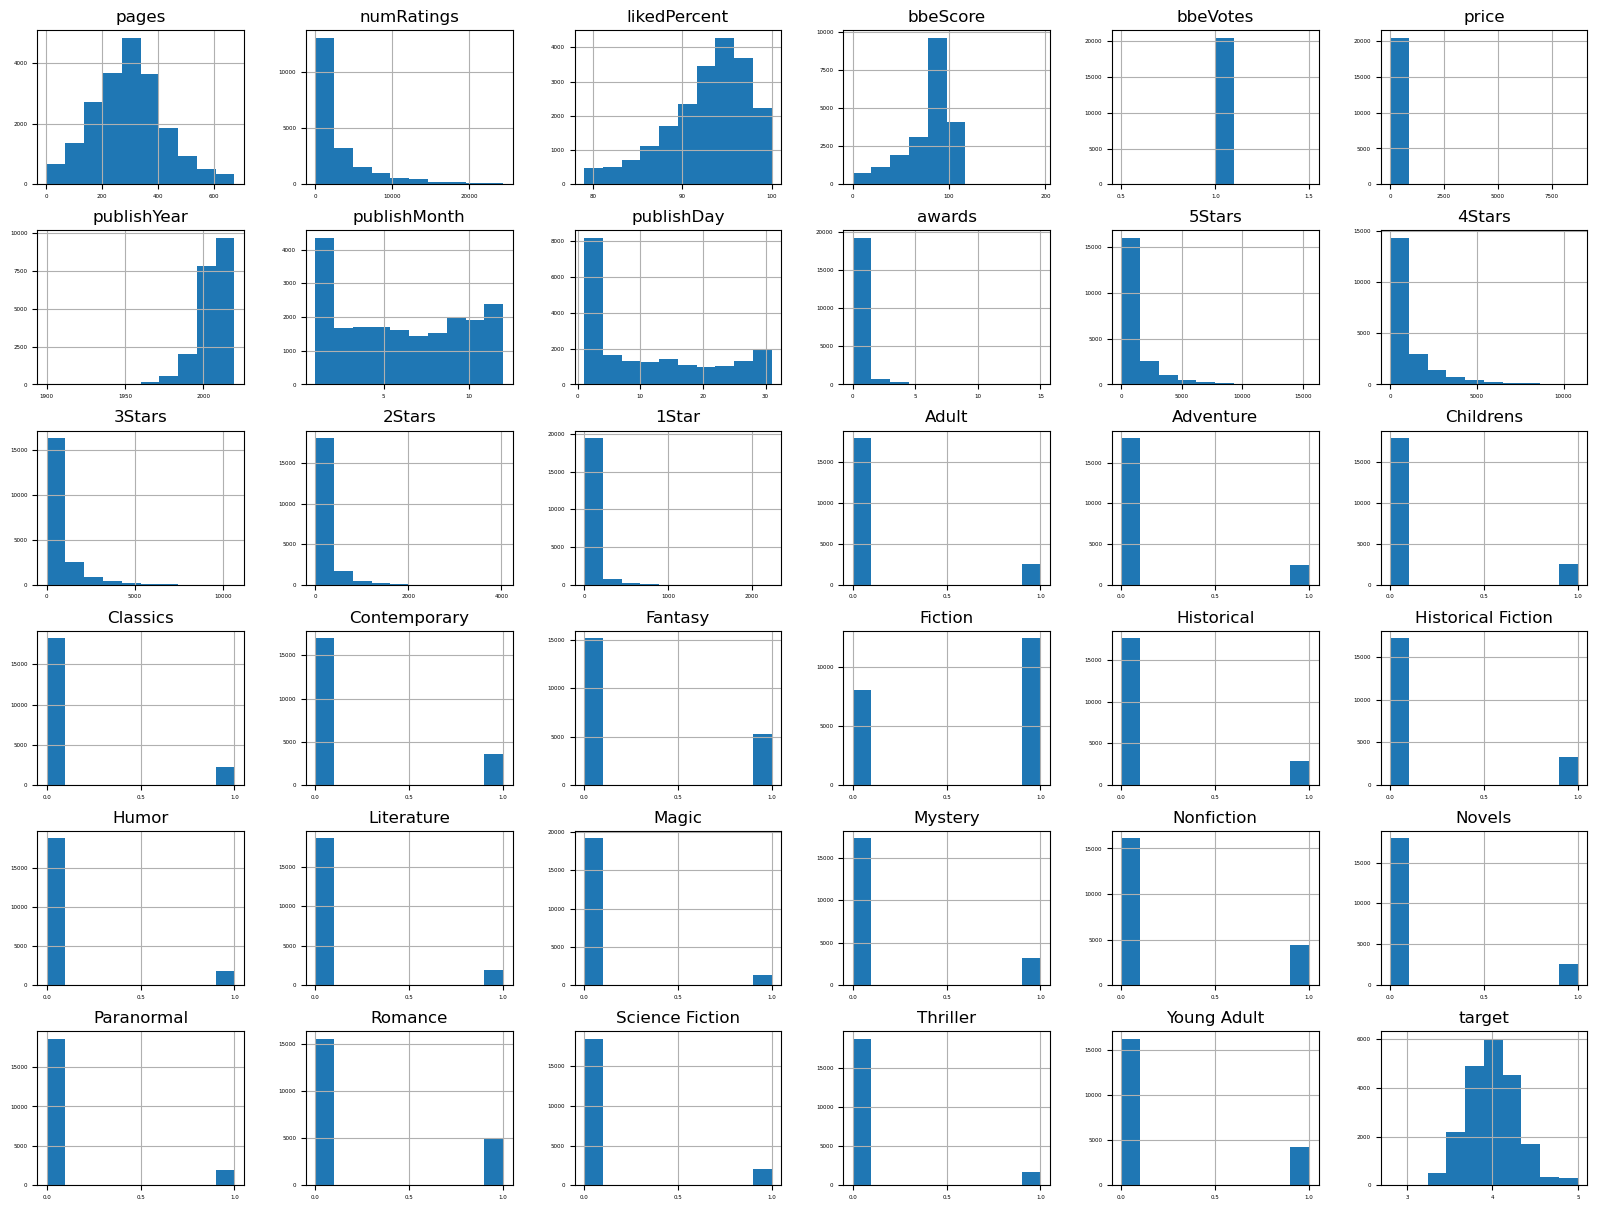

In [1667]:
fig = df_IQR.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [1668]:
datasets["IQR"] = df_IQR

##### 2.2.1.3. Borrado automático de outliers mediante el Local Outlier Factor (LOF)

In [1669]:
# from sklearn.neighbors import LocalOutlierFactor

# X = df.iloc[:, 2:8]
# y = df.iloc[:,-1]

# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X)
# yhat = yhat[yhat == -1]
# len(yhat)

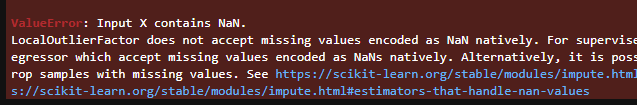

Vemos que no podemos usar este método porque contiene 'NaN' así que vamos a hacer un parón y volver a utilizarlo más adelante, después del apartado 2.3. de imputación de nulos.

#### 2.2.2. Valores perdidos

##### 2.2.2.1. Identificación de valores perdidos

In [1670]:
num_nulls = (df.isnull()).sum()

print(num_nulls)

language               4589
bookFormat             2508
pages                  2456
numRatings               93
likedPercent            707
bbeScore                 93
bbeVotes                 93
price                 14341
publishYear            1871
publishMonth           1871
publishDay             1871
awards                    0
5Stars                    0
4Stars                    0
3Stars                    0
2Stars                    0
1Star                     0
Adult                     0
Adventure                 0
Childrens                 0
Classics                  0
Contemporary              0
Fantasy                   0
Fiction                   0
Historical                0
Historical Fiction        0
Humor                     0
Literature                0
Magic                     0
Mystery                   0
Nonfiction                0
Novels                    0
Paranormal                0
Romance                   0
Science Fiction           0
Thriller            

In [1671]:
for i in range(df.shape[1]):
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d \t Missing: %d \t (%.1f%%) \t %s' % (i, n_miss, perc, df.columns[i]))

> 0 	 Missing: 4589 	 (8.8%) 	 language
> 1 	 Missing: 2508 	 (4.8%) 	 bookFormat
> 2 	 Missing: 2456 	 (4.7%) 	 pages
> 3 	 Missing: 93 	 (0.2%) 	 numRatings
> 4 	 Missing: 707 	 (1.4%) 	 likedPercent
> 5 	 Missing: 93 	 (0.2%) 	 bbeScore
> 6 	 Missing: 93 	 (0.2%) 	 bbeVotes
> 7 	 Missing: 14341 	 (27.4%) 	 price
> 8 	 Missing: 1871 	 (3.6%) 	 publishYear
> 9 	 Missing: 1871 	 (3.6%) 	 publishMonth
> 10 	 Missing: 1871 	 (3.6%) 	 publishDay
> 11 	 Missing: 0 	 (0.0%) 	 awards
> 12 	 Missing: 0 	 (0.0%) 	 5Stars
> 13 	 Missing: 0 	 (0.0%) 	 4Stars
> 14 	 Missing: 0 	 (0.0%) 	 3Stars
> 15 	 Missing: 0 	 (0.0%) 	 2Stars
> 16 	 Missing: 0 	 (0.0%) 	 1Star
> 17 	 Missing: 0 	 (0.0%) 	 Adult
> 18 	 Missing: 0 	 (0.0%) 	 Adventure
> 19 	 Missing: 0 	 (0.0%) 	 Childrens
> 20 	 Missing: 0 	 (0.0%) 	 Classics
> 21 	 Missing: 0 	 (0.0%) 	 Contemporary
> 22 	 Missing: 0 	 (0.0%) 	 Fantasy
> 23 	 Missing: 0 	 (0.0%) 	 Fiction
> 24 	 Missing: 0 	 (0.0%) 	 Historical
> 25 	 Missing: 0 	 (0.0%) 	 Hi

Vemos que tenemos en muchas columnas un grave problema de valores nulos, así que como viene así estructurado en la asignatura en este apartado simplemente vamos a eliminarlos. Más adelante los imputaremos.

##### 2.2.2.2. Borrado de filas con valores nulos

In [1672]:
ds_aux = datasets.copy()
for key, value in ds_aux.items():
    print(key)
    aux = value.copy()
    aux.dropna(inplace=True)
    #Antes
    print(value.shape)
    #Después
    print(aux.shape)
    datasets[f"{key}_NoNulls"] = aux

Original
(52354, 38)
(34442, 38)
Sin baja varianza
(52354, 23)
(34442, 23)
SDM
(35040, 38)
(32475, 38)
IQR
(20501, 38)
(18586, 38)


Vemos que pasamos a tener unas 30.000 instancias.

In [1673]:
 datasets["Original_NoNulls"]

,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,publishYear,publishMonth,...,Magic,Mystery,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Thriller,Young Adult,target
title,,,,,,,,,,,,,,,,,,,,,
The Hunger Games,English,Hardcover,374.0,6376780.0,96.0,2993816.0,30516.0,5.09,2008.0,9.0,...,0,0,0,0,0,1,1,0,1,4.33
Harry Potter and the Order of the Phoenix,English,Paperback,870.0,2507623.0,98.0,2632233.0,26923.0,7.38,2004.0,9.0,...,1,0,0,0,0,0,0,0,1,4.50
Twilight,English,Paperback,501.0,4964519.0,78.0,1459448.0,14874.0,2.10,2006.0,9.0,...,0,0,0,0,1,1,0,0,1,3.60
The Book Thief,English,Hardcover,552.0,1834276.0,96.0,1372809.0,14168.0,3.80,2006.0,3.0,...,0,0,0,0,0,0,0,0,1,4.37
Animal Farm,English,Paperback,141.0,2740713.0,91.0,1276599.0,13264.0,4.42,1996.0,4.0,...,0,0,0,1,0,0,1,0,0,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attracted to Fire,English,Paperback,416.0,2143.0,95.0,0.0,1.0,5.55,2011.0,10.0,...,0,1,0,0,0,1,0,0,0,4.14
Unbelievable,English,Paperback,360.0,1028.0,94.0,0.0,1.0,19.18,2013.0,4.0,...,0,1,0,0,0,1,0,0,1,4.16
Marked,English,Paperback,280.0,6674.0,84.0,0.0,1.0,7.37,2011.0,3.0,...,0,0,0,0,1,1,0,0,1,3.70


### 2.3. Imputación de valores perdidos

En este apartado vamos un poco a ciegas, porque no podemos comprobar que tan bien funciona cada imputación ya que tenemos variables categóricas de las que aún no hemos podido encargarnos. Así que vamos a crear un dataset para cada técnica y los validaremos más adelante.
<br><br>
Además, para todas las variables categóricas no ordinales aplicaremos 'most_frequent'. En caso de que tuvieramos variables categóricas ordinales, podríamos plantearnos aplicar un ordinal encoder y después imputar con otra técnica diferente, pero como en nuestro dataset no hay variables de ese tipo no es necesario. Aplicaremos el resto de técnicas para las númericas.

#### 2.3.1. Imputación estadística

In [ ]:
aux.info()

In [ ]:
X_cat = aux.iloc[:, [0, 1, 3, 4, 10, 11]]
X_num = aux.iloc[:, [2, 5, 6, 7, 8, 9]]
y = aux.iloc[:, -1]

In [ ]:
X_cat = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_cat), columns = X_cat.columns, index=X_cat.index)

In [ ]:
from sklearn.impute import SimpleImputer

strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    X_num_imputed = pd.DataFrame(SimpleImputer(strategy=s).fit_transform(X_num), columns = X_num.columns, index=X_num.index)
    exec(f'df_imputed_{s} = pd.concat([X_num_imputed, X_cat, y], axis=1)')

In [ ]:
#Probamos cada estrategia:
for s in strategies:
    print(s)
    exec(f'print((df_imputed_{s}.isnull()).sum())')

Vemos que está todo perfecto y sin nulos.

#### 2.3.2. Imputación por KNN

Hacemos lo mismo con al estrategia de imputación por KNN, vamos a tener un dataframe para cada KNN desde el 2 al 20 contando de dos en dos.

In [ ]:
from sklearn.impute import KNNImputer

strategies = [i for i in range(1,22,2)]
for s in strategies:
    X_num_imputed = pd.DataFrame(KNNImputer(n_neighbors=s).fit_transform(X_num), columns = X_num.columns, index=X_num.index)
    exec(f'df_imputed_KNN{s} = pd.concat([X_num_imputed, X_cat, y], axis=1)')

#### 2.3.3. Outliers con LOF

Ya que en el momento de hacer el eliminado de espurios con el método LOF no hemos podido porque teniamos valores faltantes, lo retomamos en este apartado. Por simplificar las cosas vamos a dar por hecho que el que utiliza la media para imputar los valores faltantes numéricos es el mejor, y es el que vamos a utilizar para eliminar los espurios.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

X = df_imputed_mean.iloc[:, [0, 1, 2, 3, 4, 5]]
y = df_imputed_mean.iloc[:,-1]

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
yhat = yhat[yhat == -1]
len(yhat)

In [ ]:
yhat = lof.fit_predict(X)
df_fin_3 = df_imputed_mean[yhat == 1]
df_fin_3.shape

In [ ]:
df_fin_3.head()

### 2.4. Ordinal Encoding y One Hot Encoding

Para este apartado, vamos a determinar primero qué variables serán transformadas con OrdinalEncoder y cuales con One Hot Encoding.
<br><br>
Para OneHotEncoder:
   - language, 
   - bookFormat, 
   - publisher, 
   - author,
   - genres


Para OrdinalEncoder:
   - publishDate

In [1679]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['language']
onehot_encoder = OneHotEncoder(sparse=False)
feature_arr = onehot_encoder.fit_transform(datasets["Original_NoNulls"][cat_cols])
feature_labels = onehot_encoder.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns=feature_labels, index=datasets["Original_NoNulls"].index)

datasets["Original_NoNulls"].drop(cat_cols, axis=1, inplace=True)
datasets["Original_NoNulls"] = pd.concat([datasets["Original_NoNulls"],features], axis=1)

In [1680]:
cat_cols = ['bookFormat']
onehot_encoder = OneHotEncoder(sparse=False)
feature_arr = onehot_encoder.fit_transform(datasets["Original_NoNulls"][cat_cols])
feature_labels = onehot_encoder.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns=feature_labels, index=datasets["Original_NoNulls"].index)

datasets["Original_NoNulls"].drop(cat_cols, axis=1, inplace=True)
datasets["Original_NoNulls"] = pd.concat([datasets["Original_NoNulls"],features], axis=1)

Vaya vaya, vemos que tenemos tantísimos valores distintos en nuestros datos categóricos que no podemos hacer esto. Así que haremos un Ordinal encoder para todos y nos curamos en disgustos.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None 
cat_cols = ['language', 'bookFormat', 'publisher', 'author', 'genres', 'publishDate']
ord_enc = OrdinalEncoder()
feature_arr = ord_enc.fit_transform(df_fin_3[cat_cols])
features = pd.DataFrame(feature_arr, columns=cat_cols, index=df_fin_3.index)

df_fin_3.drop(cat_cols, axis=1, inplace=True)
df_fin_3 = pd.concat([df_fin_3,features], axis=1)

ValueError: Shape of passed values is (52354, 1), indices imply (52354, 2)

In [ ]:
df_fin_3

Por fin tenemos nuestro dataframe limpio, codificado, sin nulos ni espurios. Vamos a ver qué valor nos da un random forest:

In [1702]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = datasets["Original_NoNulls"].values

X = np.delete(data, 35, axis=1)
y = data[:, 35]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regr = RandomForestRegressor(random_state=1)
regr.fit(X_train, y_train)

yhat = regr.predict(X_test)

accuracy = mean_squared_error(y_test, yhat)
print('RMSE: %.6f' % np.sqrt(accuracy))

RMSE: 0.064328


In [1703]:
accuracy = mean_squared_error(y_test, np.full(len(y_test), np.mean(y)))
print('RMSE: %.6f' % np.sqrt(accuracy))

RMSE: 0.290997


In [1704]:
np.std(y)

0.29151609274211954

## 3. Conclusiones